# Organ Donors Prediction

Here will be using the dataset Raw_Data_for_train_test.csv and use it to predict donors using the information contained in this dataset.

In Data analysis we will use 7 algorithms 

1.Logistic Regression

2.Linear Regression

3.Ridge Regression

4.K Neighbors Classifier

5.Lasso Regression

6.Random Forest Classifier

7.Decision Tree Classifier

8.XGBoost Classifier

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

## **Data Exploration**

In [54]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np #for large and multi-dimensional arrays
import pandas as pd #for data manipulation and analysis
import nltk 

In [55]:
##reading dataset
df = pd.read_csv('../Dataset/Raw_Data_for_train_test.csv')

print(df.shape)
df.head()

(19372, 50)


,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [56]:
df.shape

(19372, 50)

In [57]:
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

## **Data Preparation**

In [58]:
# By printing the TRAGET_D column we can clearly see that it has many Nan value
df["TARGET_D"]

0          NaN
1         10.0
2          NaN
3          NaN
4          NaN
         ...  
19367      NaN
19368      NaN
19369      NaN
19370      NaN
19371    150.0
Name: TARGET_D, Length: 19372, dtype: float64

In [59]:
# Counting the Nan value present in the TARGET_D column
df["TARGET_D"].isna().sum()

14529

In [60]:
# Now since column TARGET_D has this much of Nan value, we can drop it from the dataset
df=df.drop(['TARGET_D'],axis=1)

In [61]:
df

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,?,?,.,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,NaN,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,191687,89,66.0,1,U,1,3,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77.0,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,191746,29,NaN,1,S,1,11,U,M,...,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,191775,129,78.0,1,?,?,.,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


In [62]:
df['DONOR_AGE']=df['DONOR_AGE'].fillna(df['DONOR_AGE'].mean())

In [63]:
df['DONOR_AGE']=df['DONOR_AGE'].astype('int64')

In [64]:
df['INCOME_GROUP']=df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0])

In [65]:
df['INCOME_GROUP']=df['INCOME_GROUP'].astype('int64')

In [66]:
df['WEALTH_RATING']=df['WEALTH_RATING'].fillna(df['WEALTH_RATING'].mode()[0])

In [67]:
df['WEALTH_RATING']=df['WEALTH_RATING'].astype('int64')

In [68]:
# Removed missing values from the dataset
df=df.dropna() 

In [69]:
df

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87,0,?,?,.,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,58,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366,0,191679,137,85,1,T,2,40,U,M,...,7.0,10.0,3.0,5.0,5,12,15,126,5.32,13
19367,0,191687,89,66,1,U,1,3,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19370,0,191775,129,78,1,?,?,.,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


In [70]:
df.shape

(19126, 49)

In [71]:
# Now we need to replace some special charater like ? by some character in some column
df['URBANICITY']=df['URBANICITY'].str.replace('?','S')
df

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87,0,S,?,.,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,58,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366,0,191679,137,85,1,T,2,40,U,M,...,7.0,10.0,3.0,5.0,5,12,15,126,5.32,13
19367,0,191687,89,66,1,U,1,3,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19370,0,191775,129,78,1,S,?,.,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


In [72]:
df['SES']=df['SES'].str.replace('?','2')
df['SES']=df['SES'].astype('int64')

In [73]:
df['CLUSTER_CODE']=df['CLUSTER_CODE'].str.replace('.','40')
df['CLUSTER_CODE']=df['CLUSTER_CODE'].astype('int64')

In [74]:
df

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87,0,S,2,40,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,58,0,U,2,4,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19366,0,191679,137,85,1,T,2,40,U,M,...,7.0,10.0,3.0,5.0,5,12,15,126,5.32,13
19367,0,191687,89,66,1,U,1,3,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19370,0,191775,129,78,1,S,2,40,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

## **Data Visualization**

In [76]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')

<AxesSubplot:xlabel='TARGET_B', ylabel='IN_HOUSE'>

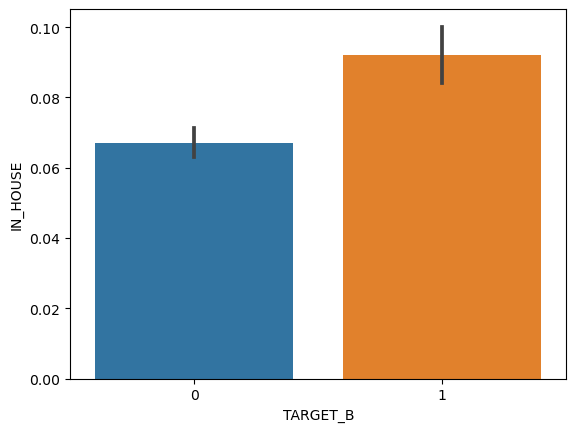

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df['TARGET_B'],y=df['IN_HOUSE'],data=df)

<AxesSubplot:xlabel='TARGET_B', ylabel='count'>

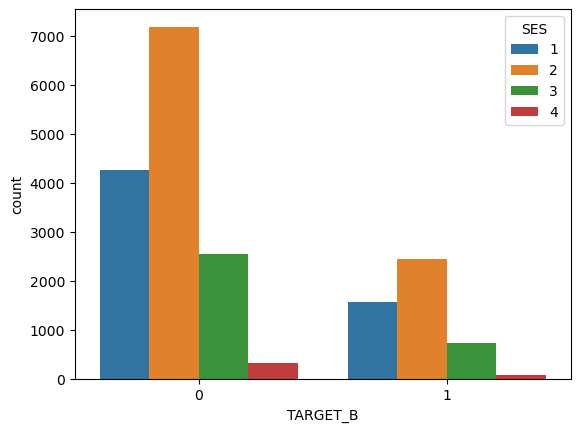

In [78]:
sns.countplot(x=df['TARGET_B'],
              hue=df['SES'],data=df)

## **Data Training**

In [79]:
y=df['TARGET_B']
X=df.drop(['TARGET_B'],axis=1)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

# **Model Creation**

### **Logistic Regression**

In [81]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression() # created a 

In [82]:
model1.fit(X_train, y_train)
# Making predictions 
pred1 = model1.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
print("Accuracy of the LogisticRegression model comes to be: \n ") 
print(model1.score(X_train,y_train))

Accuracy of the LogisticRegression model comes to be: 
 
0.745359477124183


### **Linear Regression**

In [84]:
# Linear Regression

from sklearn.linear_model import LinearRegression
model2=LinearRegression() # created a 

In [85]:
model2.fit(X_train, y_train)
# Making predictions 
pred2 = model2.predict(X_test)
pred2

array([0.27953298, 0.20357886, 0.15432169, ..., 0.35169044, 0.14332011,
       0.4599935 ])

In [86]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(model2.score(X_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.038080956035234204


### **Ridge Regression**

In [87]:
# Importing model
from sklearn.linear_model import Ridge
model3 = Ridge()

In [88]:
#Fitting data into the model.
model3.fit(X_train, y_train)
# Making predictions on Test data 
pred3 = model3.predict(X_test)
pred3

array([0.27963342, 0.20314373, 0.15427725, ..., 0.35172551, 0.1432572 ,
       0.46010533])

In [89]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(model3.score(X_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.038080907406278564


### **K Neighbors Classifier**

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=30)

In [91]:
#Fitting data into the model.
model4.fit(X_train, y_train)
# Making predictions on Test data 
pred4 = model4.predict(X_test)
pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
print("Accuracy of the K Neighbors Classifier model comes to be: \n ") 
print(model4.score(X_train,y_train))

Accuracy of the K Neighbors Classifier model comes to be: 
 
0.7455555555555555


### **Lasso Regression**

In [93]:
# Importing model
from sklearn.linear_model import Lasso
model5 = Lasso()

In [94]:
#Fitting data into the model.
model5.fit(X_train, y_train)
# Making predictions on Test data 
pred5 = model5.predict(X_test)
pred5

array([0.22902687, 0.24121741, 0.23283415, ..., 0.2505807 , 0.23892534,
       0.25184211])

In [95]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(model5.score(X_train,y_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.004415233207672786


### **Random Forest Classifier**

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()

In [97]:
model6.fit(X_train,y_train)
pred6=model6.predict(X_test)
pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
print("Accuracy of the RandomForest model comes to be: \n ") 
print(accuracy_score(y_test,pred6))

Accuracy of the RandomForest model comes to be: 
 
0.7626764244641924


### **Decision Tree Regression**

In [99]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
model7 = DecisionTreeRegressor()

In [100]:
#Fitting data into the model.
model7.fit(X_train, y_train)
# Making predictions on Test data 
pred7 = model7.predict(X_test)
pred7

array([1., 1., 0., ..., 0., 0., 0.])

In [101]:
print("Accuracy of the DecisionTree Classifier model comes to be: \n ") 
print(accuracy_score(y_test,pred7))

Accuracy of the DecisionTree Classifier model comes to be: 
 
0.6319916361735494


### **XG Boost Classifier**

In [102]:
from xgboost import XGBRegressor,XGBClassifier
model8 = XGBClassifier()

In [103]:
#Fitting data into the model.
model8.fit(X_train, y_train)
# Making predictions on Test data 
pred8 = model8.predict(X_test)
pred8

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
print("Accuracy of the XG Boost model comes to be: \n ") 
print(accuracy_score(y_test,pred8))

Accuracy of the XG Boost model comes to be: 
 
0.7370622059592263


# **Performance Evaluation**

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Logistic Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), model1.score(X_train,y_train)))
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), model2.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), model3.score(X_train,y_train)))
print("""K Neighbors Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), model4.score(X_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), model5.score(X_train,y_train)))
print("""Random Forest Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred6)), accuracy_score(y_test,pred6)))
print("""Decision Tree Classifier \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred7)), accuracy_score(y_test,pred7)))
print("""XG Boost Classifier\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred8)), accuracy_score(y_test,pred8)))

Model			 RootMeanSquareError 		 Accuracy of the model
Logistic Regression 		 0.4882 	 		 0.7454
Linear Regression 		 0.4191 	 		 0.0381
Ridge Regression 		 0.4191 	 		 0.0381
K Neighbors Classifier 		 0.4882 	 		 0.7456
Lasso Regression 		 0.4254 	 		 0.0044
Random Forest Classifier 		 0.4872 	 		 0.7627
Decision Tree Classifier 		 0.6066 	 		 0.6320
XG Boost Classifier		 0.5128 	 		 0.7371


Conclusion: Accuracy of Regression models- Linear regression, rigde regression, Lasso Regression is very low.

Whereas accuracy of Logistic Regression, K Neighbors Classifier, Random Forest Classifier, XGBoost Classifier, and Decision Tree Classifier is almost same.

And the Accuracy of the Random Forest is more, so it is efficient among all.